In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr
import statsmodels.api as sm

In [3]:
train = pd.read_csv('baseball.csv')
train.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [4]:
#Each row in the baseball dataset represents a team in a particular year.
#How many team/year pairs are there in the whole dataset?
len(train)

1232

In [5]:
#identify the total number of years included in this dataset.
len(train['Year'].unique())

47

In [6]:
#Because we're only analyzing teams that made the playoffs, use the subset() function to replace baseball with a data frame limited to teams that made the playoffs (so your subsetted data frame should still be called "baseball"). How many team/year pairs are included in the new dataset?
baseball = train[train['Playoffs'] == 1]
len(baseball)

244

In [7]:
#Through the years, different numbers of teams have been invited to the playoffs. Which of the following has been the number of teams making the playoffs in some season? Select all that apply.
baseball['Year'].value_counts().unique()

array([10,  8,  4,  2], dtype=int64)

In [8]:
#Putting it all together, we want to look up the number of teams in the playoffs for each team/year pair in the dataset, and store it as a new variable named NumCompetitors in the baseball data frame.
baseball['NumCompetitors'] = baseball.groupby('Year')['Team'].transform('nunique')

<ipython-input-8-7b8389dc77e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseball['NumCompetitors'] = baseball.groupby('Year')['Team'].transform('nunique')


In [9]:
#How many playoff team/year pairs are there in our dataset from years where 8 teams were invited to the playoffs?
baseball[baseball['NumCompetitors'] == 8]['NumCompetitors'].count()

128

In [10]:
#In this problem, we seek to predict whether a team won the World Series; in our dataset this is denoted with a RankPlayoffs value of 1. Add a variable named WorldSeries to the baseball data frame
baseball['WorldSeries'] = baseball['RankPlayoffs'] == 1

<ipython-input-10-663765234d42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseball['WorldSeries'] = baseball['RankPlayoffs'] == 1


In [11]:
baseball['WorldSeries'].value_counts()

False    197
True      47
Name: WorldSeries, dtype: int64

In [12]:
# Set 'WorldSeries' as False = 0, True = 1
baseball['WorldSeries'] = baseball['WorldSeries'].astype(int)


<ipython-input-12-f5d3323e736f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseball['WorldSeries'] = baseball['WorldSeries'].astype(int)


In [13]:
import numpy as np

print(np.isfinite(baseball.all()) == True)

Team              True
League            True
Year              True
RS                True
RA                True
W                 True
OBP               True
SLG               True
BA                True
Playoffs          True
RankSeason        True
RankPlayoffs      True
G                 True
OOBP              True
OSLG              True
NumCompetitors    True
WorldSeries       True
dtype: bool


In [14]:
#encode league
le = LabelEncoder()
le.fit(baseball['League'])
baseball['League'] = le.transform(baseball['League'])

<ipython-input-14-90d0aa806ba3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseball['League'] = le.transform(baseball['League'])


In [15]:
# use variables: Year,RS,RA,W,OBP,SLG,BA,RankSeason,OOBP,OSLG,NumCompetitors,League to build separate models for WorldSeires and not WorldSeries
model_Year = LogisticRegression().fit(baseball[['Year']], baseball['WorldSeries'])
model_RS = LogisticRegression().fit(baseball[['RS']], baseball['WorldSeries'])
model_RA = LogisticRegression().fit(baseball[['RA']], baseball['WorldSeries'])
model_W = LogisticRegression().fit(baseball[['W']], baseball['WorldSeries'])
model_OBP = LogisticRegression().fit(baseball[['OBP']], baseball['WorldSeries'])
model_SLG = LogisticRegression().fit(baseball[['SLG']], baseball['WorldSeries'])
model_BA = LogisticRegression().fit(baseball[['BA']], baseball['WorldSeries'])
model_RankSeason = LogisticRegression().fit(baseball[['RankSeason']], baseball['WorldSeries'])
# model_OOBP = LogisticRegression().fit(baseball[['OOBP']].fillna(0.321412), baseball['WorldSeries'])
# model_OSLG = LogisticRegression().fit(baseball[['OSLG']], baseball['WorldSeries'])
model_NumCompetitors = LogisticRegression().fit(baseball[['NumCompetitors']], baseball['WorldSeries'])
model_League = LogisticRegression().fit(baseball[['League']].astype(int), baseball['WorldSeries'])

#print the coefficients of each model
print(str(model_Year.coef_)+'Year')
print(str(model_RS.coef_)+'RS')
print(str(model_RA.coef_)+'RA')
print(str(model_W.coef_)+'W')
print(str(model_OBP.coef_)+'OBP')
print(str(model_SLG.coef_)+'SLG')
print(str(model_BA.coef_)+'BA')
print(str(model_RankSeason.coef_)+'RankSeason')
print(str(model_NumCompetitors.coef_)+'NumCompetitors')
print(str(model_League.coef_)+'League')



[[-0.00072084]]Year
[[-0.00183927]]RS
[[-0.00219971]]RA
[[0.05666388]]W
[[-0.08838453]]OBP
[[-0.34048542]]SLG
[[-0.01388077]]BA
[[-0.20477102]]RankSeason
[[-0.25081633]]NumCompetitors
[[-0.14315638]]League


In [16]:
print('Year'+ str(pearsonr(baseball['Year'], baseball['WorldSeries'])))
print('RS'+ str(pearsonr(baseball['RS'], baseball['WorldSeries'])))
print('RA'+ str(pearsonr(baseball['RA'], baseball['WorldSeries'])))
print('W'+ str(pearsonr(baseball['W'], baseball['WorldSeries'])))
print('OBP'+ str(pearsonr(baseball['OBP'], baseball['WorldSeries'])))
print('SLG'+ str(pearsonr(baseball['SLG'], baseball['WorldSeries'])))
print('BA'+ str(pearsonr(baseball['BA'], baseball['WorldSeries'])))
print('RankSeason'+ str(pearsonr(baseball['RankSeason'], baseball['WorldSeries'])))
print('NumCompetitors'+ str(pearsonr(baseball['NumCompetitors'], baseball['WorldSeries'])))
print('League'+ str(pearsonr(baseball['League'], baseball['WorldSeries'])))


Year(-0.21348886305452575, 0.0007894786264089918)
RS(-0.08209385400280478, 0.2012775854564049)
RA(-0.1438514033671618, 0.024627728292387952)
W(0.12278171828205971, 0.05545219783913406)
OBP(-0.06707137916603281, 0.2967242004036922)
SLG(-0.12636418307843802, 0.04865001755483349)
BA(-0.01304151855126612, 0.8393870625115867)
RankSeason(-0.1304681298750651, 0.04172789668135836)
NumCompetitors(-0.22390392133055326, 0.0004244712184088777)
League(-0.03117735102220952, 0.627943922521877)


In [17]:
#Build a model using all of the variables that you found to be significant in the bivariate models.
model_all = LogisticRegression().fit(baseball[['Year','RS','RA','W','OBP','SLG','BA','RankSeason','NumCompetitors','League']], baseball['WorldSeries'])
#How many variables are significant?
model_all.coef_


C:\Users\kyle.liu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[-0.00311691, -0.00101911,  0.00077859,  0.06460689,  0.00094001,
        -0.00082239,  0.00270343,  0.08829368, -0.23184205, -0.0564117 ]])

In [19]:
model_all_sm = sm.Logit(baseball['WorldSeries'], baseball[['Year','RS','RA','W','OBP','SLG','BA','RankSeason','NumCompetitors','League']])
model_all_sm.fit().summary()

Optimization terminated successfully.
         Current function value: 0.456582
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WorldSeries   No. Observations:                  244
Model:                          Logit   Df Residuals:                      234
Method:                           MLE   Df Model:                            9
Date:                Tue, 28 Dec 2021   Pseudo R-squ.:                 0.06821
Time:                        17:18:29   Log-Likelihood:                -111.41
converged:                       True   LL-Null:                       -119.56
Covariance Type:            nonrobust   LLR p-value:                   0.06069
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Year              -0.0057      0.005     -1.105      0.269      -0.016       0.004
RS                -0.0039      0.009     -0.441      0.659      -0.021       0.013
RA                 0.0012      0.006      0.213      0.832      -0.010       0.012
W                  0.0720      0.064      1.118      0.264      -0.054       0.198
OBP               -4.5193     29.944     -0.151      0.880     -63.208      54.170
SLG               -5.6447     15.957     -0.354      0.724     -36.919      25.630
BA                37.6764     28.305      1.331      0.183     -17.800      93.153
RankSeason         0.0706      0.176      0.401      0.688      -0.274       0.416
NumCompetitors    -0.1804      0.107     -1.680      0.093      -0.391       0.030
League            -0.1829      0.367     -0.498      0.619      -0.903       0.537
==================================================================================
"""

<AxesSubplot:>

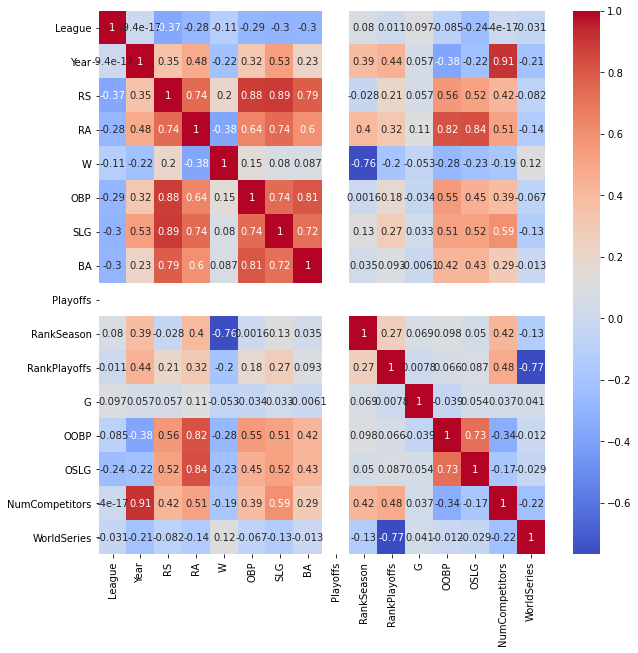

In [ ]:
#Often, variables that were significant in bivariate models are no longer significant in multivariate analysis due to correlation between the variables. Which of the following variable pairs have a high degree of correlation (a correlation greater than 0.8 or less than -0.8)? Select all that apply.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(baseball.corr(), annot=True,cmap = 'coolwarm')

In [21]:
#caculate AIC
model_Year_RankSeason = sm.Logit(baseball['WorldSeries'], baseball[['Year','RankSeason']])

#view AIC of model
print(model_Year_RankSeason.fit().aic)



Optimization terminated successfully.
         Current function value: 0.480674
         Iterations 6
238.56896279484107
